In [1]:
import numpy as np
from matplotlib import pyplot as plt
from glob import glob
import pickle
from operator import itemgetter

In [2]:
# list all saved files in directory
directory_template = '/home/kateb/Desktop/Computational-Biophysics-2019/monte carlo/data/box/'
list_of_pkl = glob(directory_template + '*.pkl')

list_of_pkl

['/home/kateb/Desktop/Computational-Biophysics-2019/monte carlo/data/box/0.6.pkl',
 '/home/kateb/Desktop/Computational-Biophysics-2019/monte carlo/data/box/1.9000000000000001.pkl',
 '/home/kateb/Desktop/Computational-Biophysics-2019/monte carlo/data/box/0.95.pkl',
 '/home/kateb/Desktop/Computational-Biophysics-2019/monte carlo/data/box/1.3.pkl',
 '/home/kateb/Desktop/Computational-Biophysics-2019/monte carlo/data/box/1.15.pkl',
 '/home/kateb/Desktop/Computational-Biophysics-2019/monte carlo/data/box/0.7.pkl',
 '/home/kateb/Desktop/Computational-Biophysics-2019/monte carlo/data/box/2.45.pkl',
 '/home/kateb/Desktop/Computational-Biophysics-2019/monte carlo/data/box/2.3.pkl',
 '/home/kateb/Desktop/Computational-Biophysics-2019/monte carlo/data/box/2.05.pkl',
 '/home/kateb/Desktop/Computational-Biophysics-2019/monte carlo/data/box/2.4000000000000004.pkl',
 '/home/kateb/Desktop/Computational-Biophysics-2019/monte carlo/data/box/1.4500000000000002.pkl',
 '/home/kateb/Desktop/Computational-Bi

In [12]:
def calc_ac(x,n,r):
    left = np.roll(x,r,axis=1)
    right = np.roll(x,-r,axis=1)
    up = np.roll(x,r,axis=0)
    down = np.roll(x,-r,axis=0)
    left_up=np.roll(np.roll(x,r,axis=1),1,axis=0)
    left_down = np.roll(np.roll(x,r,axis=1),-r,axis=0)
    right_up = np.roll(np.roll(x,-r,axis=1),r,axis=0)
    right_down = np.roll(np.roll(x,-r,axis=1),-r,axis=0)
    
    e = (1/n) * 0.25 * sum(sum(x * (left + right + up + down + left_up + left_down + right_up + right_down)))
    return e

In [21]:
list_of_ac_all_box = []
for each_box in list_of_pkl:
    # open each file and convert to numpy array
    with open(each_box,'rb') as f:
        box = np.array(pickle.load(f))
        # Find T based on the name of the file
        T = float(each_box.split('/')[-1][:-4])
    list_of_ac = []
    for i in range(len(box)-1):
        list_of_ac.append(calc_ac(box,150,i+1))
    list_of_ac_all_box.append(min(list_of_ac))

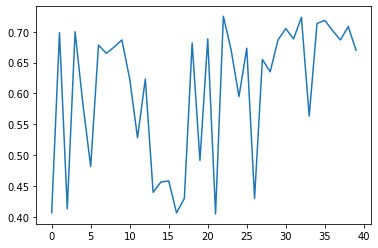

In [22]:
plt.plot(list_of_ac_all_box)
plt.show()